## Assignment-11_Text Mining

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
!pip install wordcloud

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
!python -m spacy download en_core_web_md

2022-08-03 00:55:30.914908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-03 00:55:30.914959: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-03 00:55:43.878659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-03 00:55:43.878693: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 00:55:43.886379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: GEBBS_L336
2022-08-03 00:55:43.886647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: GEBBS_L336



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [9]:
import chardet
with open(R"\Users\ammaurya\Desktop\Data Science\Assignments\11-Text Mining/Elon_musk.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [10]:
import pandas
data=pd.read_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\11-Text Mining/Elon_musk.csv",encoding="Windows-1252",error_bad_lines=False)

C:\Users\ammaurya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [12]:
data.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [13]:
import re
def clean_tweets(tweets):
    tweets = re.sub('@[A-Za-z0-100_]+', '', tweets) #Removing tag(@)
    tweets = re.sub('#', '', tweets) # Removing hashtag(#)
    tweets = re.sub('RT[\s]+', '', tweets) # Removing Retweets
    tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
    tweets = re.sub('<[^<]+?>', '', tweets) #remove html tags
    tweets = re.sub('\n', '', tweets) # remove new lines
    tweets = re.sub('&amp;', '', tweets) #remove &amp
    # tweets = re.sub('[^\w]', '', tweets) #remoce _
    return tweets
 
data['statement'] = data.Text.apply(clean_tweets)

In [14]:
data

,Text,statement
0,@kunalb11 I’m an alien,I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative ..."
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms conditions before...
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is


In [15]:
#Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data.Text= data.Text.apply(lambda x: cleaning_punctuations(x))
data.head()

,Text,statement
0,kunalb11 I’m an alien,I’m an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...,Ray tracing on Cyberpunk with HDR is next-lev...
2,joerogan Spotify Great interview,Great interview!
3,gtera27 Doge is underestimated,27 Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...,Congratulations Tesla China for amazing execu...


In [16]:
data = [statement.strip() for statement in data.statement] # remove both the leading and the trailing characters
data = [statement for statement in data if statement] # removes empty strings, because they are considered in Python as False
data[0:10]

['I’m an alien',
 'Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 '27 Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'Frodo was the underdoge,All thought he would fail,Himself most of all.',
 'Haha thanks :)',
 'Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [17]:
# Joining the list into one string/text
statement = ' '.join(data)
statement

'I’m an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! 27 Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! Frodo was the underdoge,All thought he would fail,Himself most of all. Haha thanks :) Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account This is true power haha Any crypto wallet that won’t give you your private keys should be avoided at all costs Your app sucks : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! Yes 3   Once we can predict cash flow reasonably well, Starlink will IPO Star

In [18]:
#Punctuation
no_punc_text = statement.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'I’m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview 27 Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdogeAll thought he would failHimself most of all Haha thanks  Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account This is true power haha Any crypto wallet that won’t give you your private keys should be avoided at all costs Your app sucks  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes 3   Once we can predict cash flow reasonably well Starlink will IPO Starlink is a staggeringl

In [19]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', '27', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdogeAll', 'thought']


In [20]:
len(text_tokens)

17607

In [21]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['I', '’', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', '27', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdogeAll', 'thought', 'would', 'failHimself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent']


In [22]:
#Noramalize the data
lower_words = [statement.lower() for statement in no_stop_tokens]
print(lower_words[0:25])

['i', '’', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', '27', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even']


In [23]:
!python -m spacy download en

2022-08-03 01:12:13.904374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-03 01:12:13.904423: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-03 01:12:26.988056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-03 01:12:26.988088: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 01:12:26.995675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: GEBBS_L336
2022-08-03 01:12:26.995901: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: GEBBS_L336



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
spacy.load('en_core_web_sm')

In [27]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [28]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

I ’ alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview 27 Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdogeAll thought would failHimself Haha thanks Indeed Tweets definitely represent


In [29]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', "'", 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'great', 'interview', '27', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even']


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [31]:
print(vectorizer.vocabulary_)

{'alien': 260, 'ray': 2471, 'trace': 3153, 'cyberpunk': 845, 'hdr': 1450, 'nextlevel': 2070, 'have': 1445, 'try': 3186, 'great': 1396, 'interview': 1654, '27': 62, 'doge': 973, 'underestimate': 3232, 'congratulations': 751, 'tesla': 3057, 'china': 658, 'amazing': 283, 'execution': 1144, 'last': 1739, 'year': 3454, 'now': 2098, 'next': 2069, 'even': 1118, 'happy': 1433, 'new': 2067, 'ox': 2201, 'frodo': 1296, 'underdogeall': 3231, 'think': 3087, 'would': 3439, 'failhimself': 1180, 'haha': 1422, 'thank': 3068, 'indeed': 1592, 'tweets': 3206, 'definitely': 883, 'represent': 2539, 'realworld': 2487, 'time': 3111, 'allocation': 264, 'the': 3073, 'entertaining': 1089, 'outcome': 2177, 'likely': 1794, 'just': 1696, 'send': 2685, 'agree': 243, 'clubhouse': 688, 'it': 1673, 'get': 1356, 'real': 2482, 'bought': 527, 'dogecoin': 975, 'lil': 1795, 'toddler': 3124, 'hodler': 1498, 'he': 1451, 'issue': 1672, 'sentencing': 2689, 'seem': 2676, 'bit': 486, 'high': 1484, 'fix': 1243, 'please': 2299, 'un

In [32]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['23life', '24', '240am', '247', '247teslanew', '25', '250', '250kw', '25d', '25gunscom', '25k', '25th', '27', '28', '2823', '28715306', '28delayslater', '28th', '29', '2908', '2ejaxa', '2funny1', '2jr', '2k', '2nd', '2v', '30', '300', '301', '3031925', '304', '304l', '305', '31', '31345919', '32292601', '33', '330', '35079089', '360', '37', '3800', '394', '39a', '3arm13arm', '3d', '3ericralph31', '3extrachar', '3owner', '3rd']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\ammaurya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print(X.toarray().shape)

(12398, 3473)


In [34]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)

In [35]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'all', 'also', 'an', 'and', 'are', 'as', 'at', 'be', 'best', 'but', 'by', 'can', 'coming', 'could', 'crew', 'do', 'dragon', 'earth', 'falcon', 'first', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'if', 'in', 'in the', 'is', 'is the', 'it', 'just', 'launch', 'like', 'lot', 'make', 'maybe', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 're', 'should', 'so', 'some', 'soon', 'spacex', 'starship', 'still', 'sure', 'tesla', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'to be', 'to the', 'too', 'true', 'very', 'was', 'we', 'we re', 'what', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '20', '247', '28delayslater', '3031925', '305', '3d', '3owners', '45', '60', '74', '742', '85', 'about', 'absolutely', 'access', 'accurate', 'actually', 'after', 'ai', 'air', 'all', 'almost', 'already', 'also', 'although', 'am', 'amazing', 'an', 'and', 'any', 'appreciated', 'are', 'are the', 'around', 'as', 'astronauts', 'at', 'at tesla', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'battery', 'be', 'be great', 'because', 'been', 'before', 'being', 'berlin', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'body', 'booster', 'both', 'build', 'but', 'but it', 'but we', 'by', 'call', 'called', 'can', 'can be', 'car', 'cargo', 'cars', 'close', 'cold', 'come', 'coming', 'coming soon', 'companies', 'completed', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'course', 'course still', 'course still love', 'cov2', 'crew', 'crew dragon', 'critical', 'data', 'day', 'days', 'definitely', 'design', 'did', 'didn', 'different', 'do', 'does', 'doesn', 'doge', 'doing', 'doj

In [37]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [42]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='Green', max_words=100,colormap='Set2',stopwords=stopwords).generate(statement)

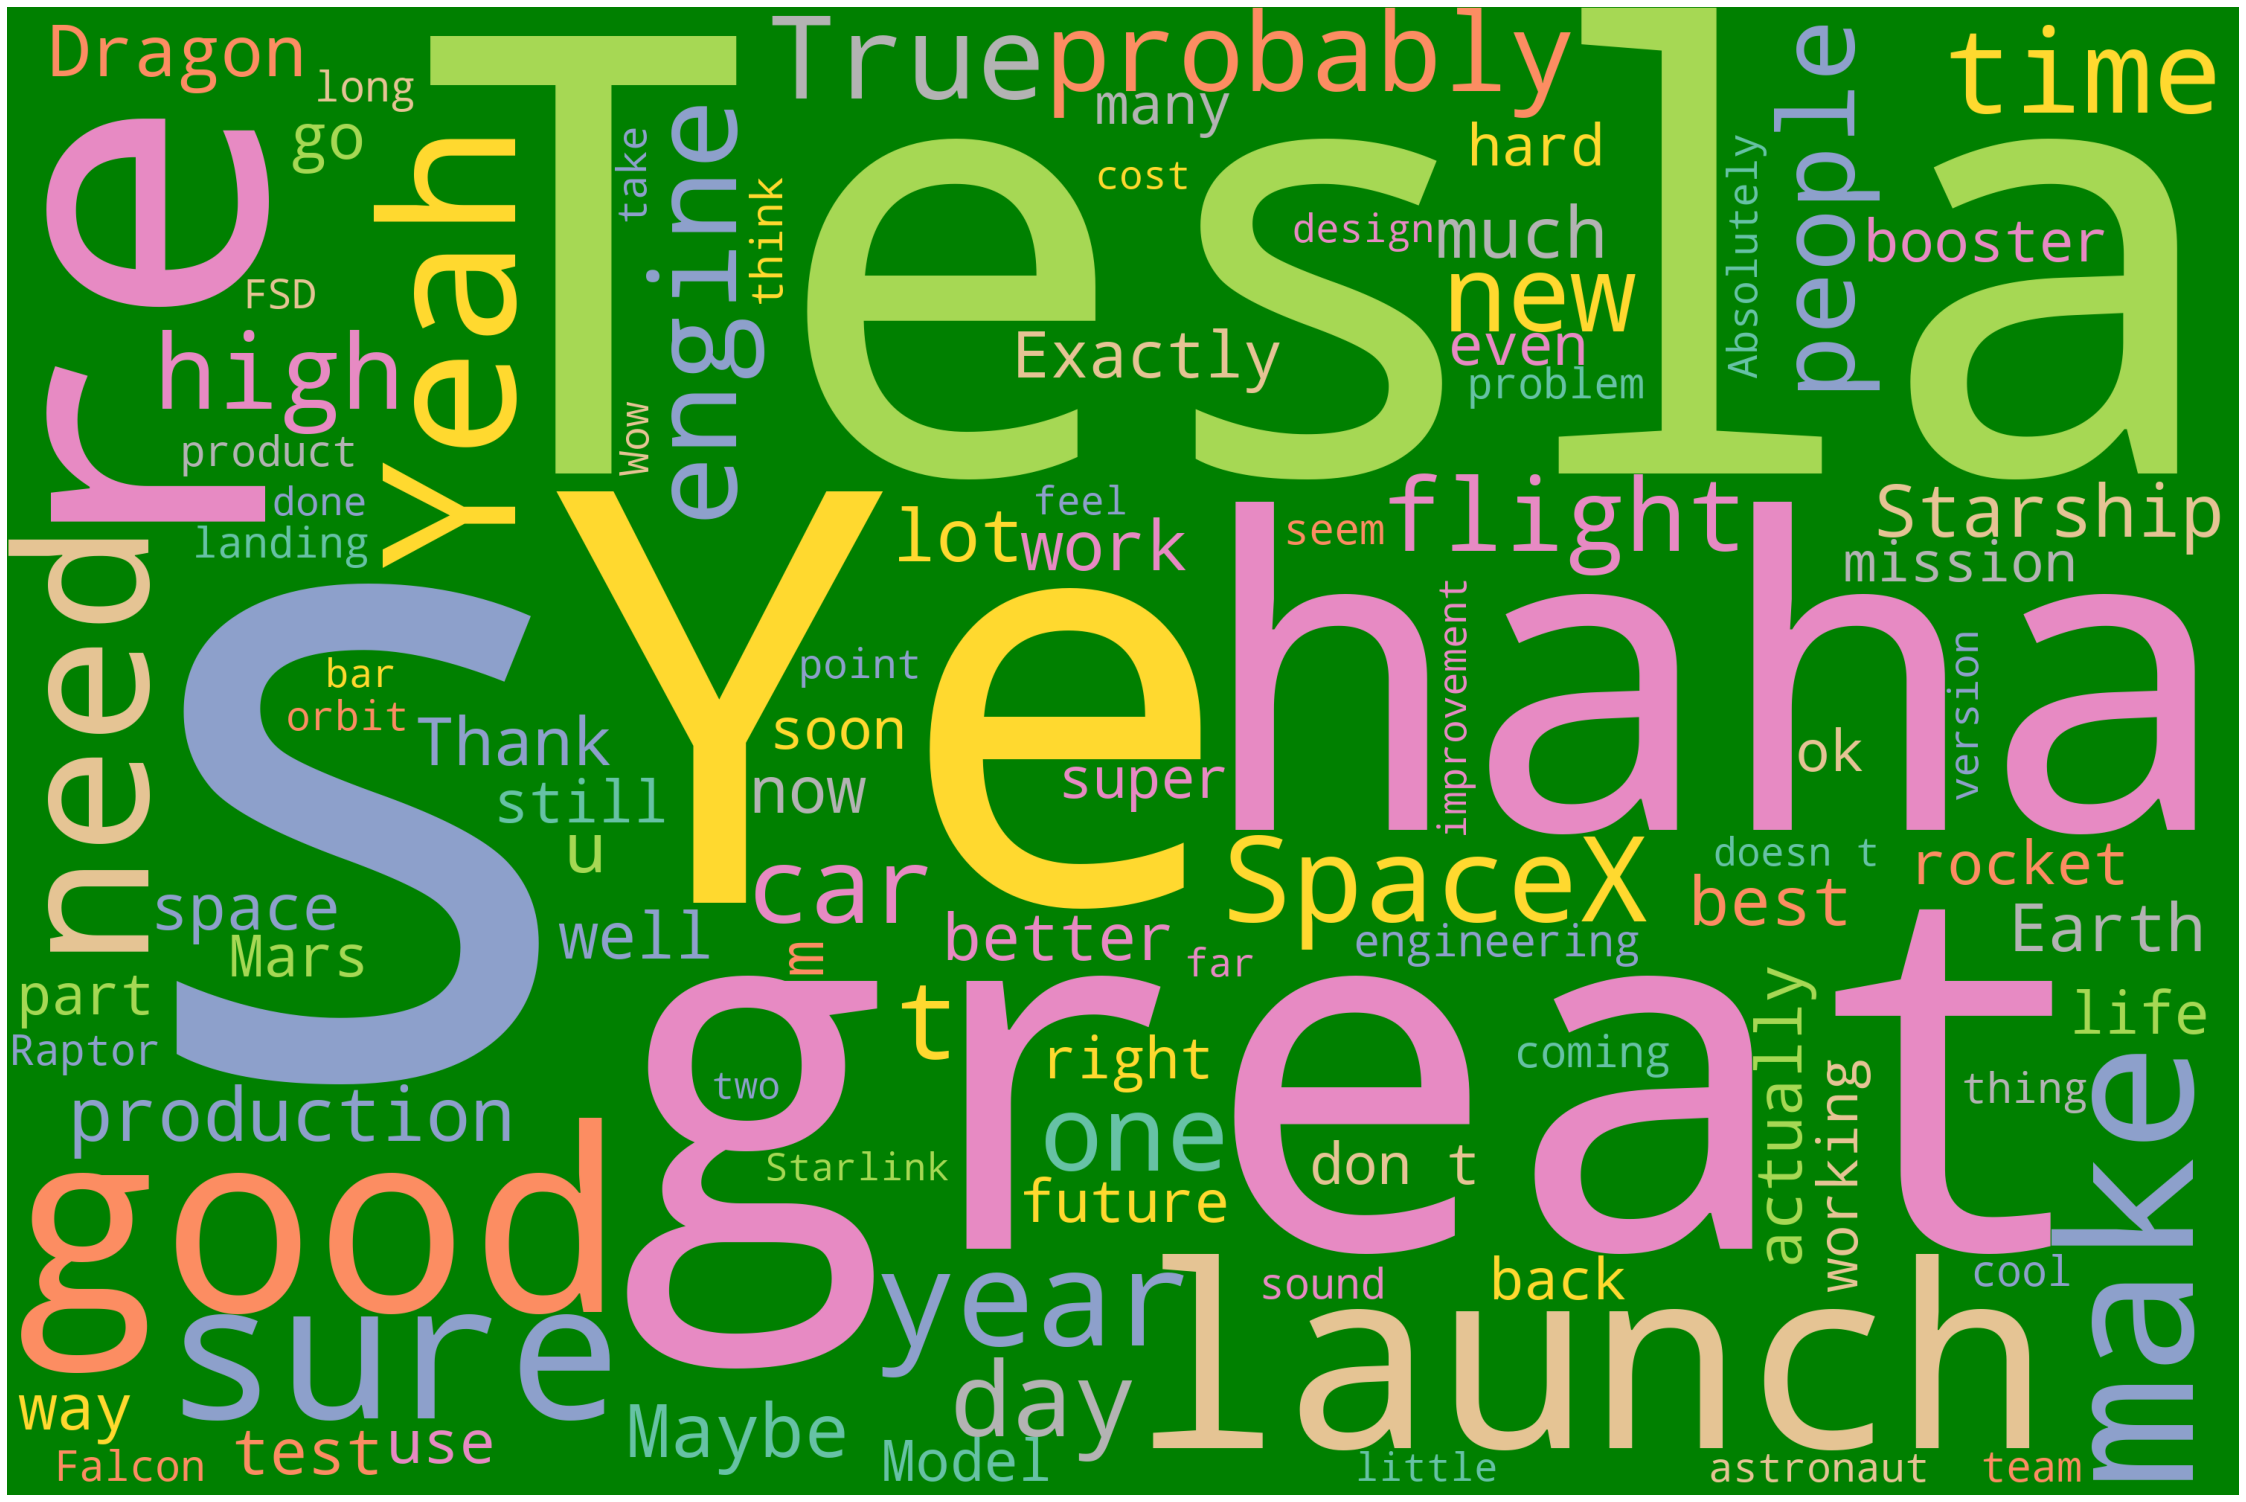

In [43]:
# Plot
plot_cloud(wordcloud)